<center> <b> <h1> Absolute permeability of a rock sample </h1> </b> </center>

<h2> 1. Klinkenberg corrected permeability </h2>

#### The porous media of Berea sandstone was fully saturated with air flow at a pressure of 150 bar. The data collected from this experiment will be initially analyzed using the Klinkenberg equation.

$$ K_{air}=K_l\left(1+\frac{b}{P_{avg}}\right) $$

#### The permeability of air ($K_{air}$) and the reciprocal of the average pressure ($1/P_{avg}$) will be determined by using the equations provided below.

$$ Q_2=\frac{K_{air}A}{2{\mu }_{air}l}\frac{({P_1}^2-{P_2}^2)}{P_2} $$

$$ P_{avg}=\frac{P_1+P_2}{2} $$

#### The first five values from the table will be displayed. The data were imported from an Excel file.

In [1]:
import pandas as pd

#skiprows+2=excel_rows
df = pd.read_excel("gas permeability.xlsx", sheet_name="Klinkenberg150bar", skiprows=6, usecols=[0, 1], nrows=38)
df.columns = ["DP(psia)", "Q(ml/min)"]
df.head()

,DP(psia),Q(ml/min)
0,15.0,41
1,17.6,51
2,20.4,60
3,23.3,70
4,25.1,76


In [2]:
import math 

Qoffset = -1
df["Q(ml/sec)"] = (df["Q(ml/min)"] - Qoffset) / 60
df["P1(atm)"] = df["DP(psia)"] * 0.068045957064302 + 1
df["1/Pavg(1/atm)"] = 2 / (df["P1(atm)"] + 1)
df["Kair(mD)"] = (2000 * df["Q(ml/sec)"] * 0.01844 * 1 * 4.751) / (math.pi * 2.543 ** 2 / 4 * 
                 (df["P1(atm)"] ** 2 - 1 ** 2))
df.head()

,DP(psia),Q(ml/min),Q(ml/sec),P1(atm),1/Pavg(1/atm),Kair(mD)
0,15.0,41,0.700000,2.020689,0.662101,7.832344
1,17.6,51,0.866667,2.197609,0.625467,7.807376
2,20.4,60,1.016667,2.388138,0.590295,7.457245
3,23.3,70,1.183333,2.585471,0.557807,7.181183
4,25.1,76,1.283333,2.707954,0.539381,6.990729


#### It is clear that the data follows a linear regression model when using the Klinkenberg equation.

In [3]:
x1 = df["1/Pavg(1/atm)"]
y1 = df["Kair(mD)"]

In [4]:
import statsmodels.api as sm

x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
yhat = model1.predict(x1)

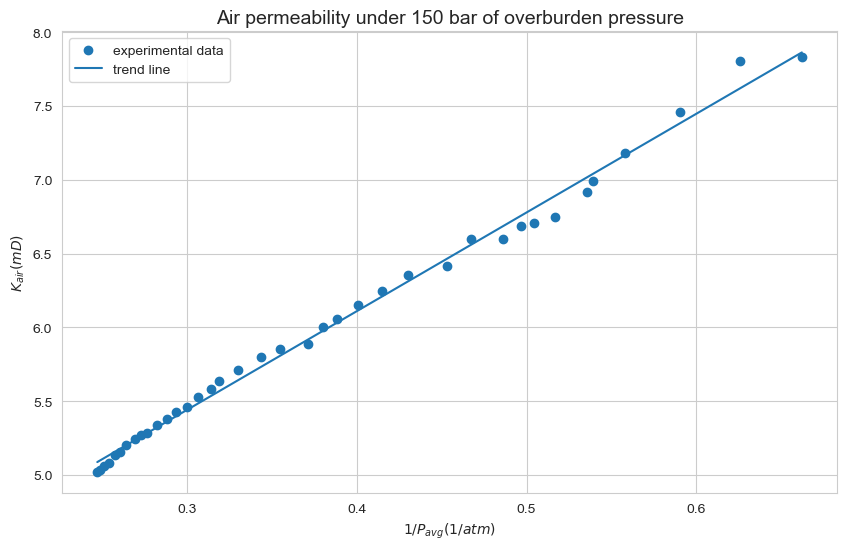

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid')
width = 10
height = 6
plt.figure(figsize=(width, height))
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 10)
plt.ylabel("$K_{air}(mD)$", fontsize = 10)
plt.title("Air permeability under 150 bar of overburden pressure", fontsize = 14)

plt.scatter(df["1/Pavg(1/atm)"], df["Kair(mD)"], label="experimental data")
plt.plot(df["1/Pavg(1/atm)"], yhat, label="trend line")
plt.legend();

In [6]:
import numpy as np

f = np.polyfit(df["1/Pavg(1/atm)"], df["Kair(mD)"], 1)
p = np.poly1d(f)
print("The linear regression estimator y is", p)

The linear regression estimator y is  
6.687 x + 3.435


In [7]:
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Kair(mD)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5946.
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.42e-41
Time:                        22:43:10   Log-Likelihood:                 51.915
No. Observations:                  38   AIC:                            -99.83
Df Residuals:                      36   BIC:                            -96.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4350      0.035     98.777

#### The R-squared coefficient is close to 1, indicating a strong correlation between the trend line and the data. This confirms that the trend line fits the data well. Additionally, the R-squared value is consistent with a linear regression model.

#### $${\boldsymbol{K}}_{\boldsymbol{l}}\boldsymbol{=}{\boldsymbol{3},\boldsymbol{43}}^{\boldsymbol{\ +}}_{\boldsymbol{\ -}}\boldsymbol{\ }\boldsymbol{0},\boldsymbol{03}\boldsymbol{\ }\boldsymbol{mD}$$

#### A data frame containing experimental data will be utilized, which were collected at an overburden pressure of 60 bar.

In [8]:
df2 = pd.read_excel("gas permeability.xlsx", sheet_name="second order slip equation", skiprows=0, 
      usecols=[0, 1], nrows=36) #skiprows+2=excel_rows
df2.columns = ["DP(psia)", "Q(ml/min)"]
df2.head()

,DP(psia),Q(ml/min)
0,5.4,120.0
1,6.6,151.0
2,7.5,173.0
3,8.4,197.0
4,9.5,225.0


In [9]:
df2["Q(ml/sec)"] = df2["Q(ml/min)"] / 60
df2["P1(atm)"] = df2["DP(psia)"] * 0.068045957064302 + 1
df2["1/Pavg(1/atm)"] = 2 / (df2["P1(atm)"] + 1)
df2["Kair(mD)"] = (2000 * df2["Q(ml/sec)"] * 0.01844 * 1 * 4.751) / (math.pi * 2.543 ** 2 / 4 * 
                  (df2["P1(atm)"] ** 2 - 1 ** 2))

<li><b>The data align with both the second order slip equation and the Klinkenberg equation. As can be seen from the graphs below, the reciprocal pressure range is limited, making it unclear which regression model best fits the data due to experimental limitations. The first equation is a generalized air flow predictor and coincides with the second when the slip flow of molecules on the capillary wall is insignificant. In order to evaluate whether the data is sufficient to predict corrected permeability using the quadratic regression model, the statistical table will be analyzed more extensively. The second order slip equation is:
</b></li>

$$K_{air}=K_l\left(1+A\frac{1}{P_{avg}}+B\frac{1}{{P_{avg}}^2}\right)$$

In [10]:
x2 = df2["1/Pavg(1/atm)"]
y2 = df2["Kair(mD)"]

inds = x2.ravel().argsort()   
x2 = x2.ravel()[inds].reshape(-1,1)
y2 = y2[inds] 

In [11]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
xp2 = polynomial_features.fit_transform(x2)

In [12]:
model2 = sm.OLS(y2, xp2).fit()
ypred = model2.predict(xp2)

In [13]:
x3 = df2["1/Pavg(1/atm)"]
y3 = df2["Kair(mD)"]

x3 = sm.add_constant(x3)
model3 = sm.OLS(y3, x3).fit()
yhat2 = model3.predict(x3)

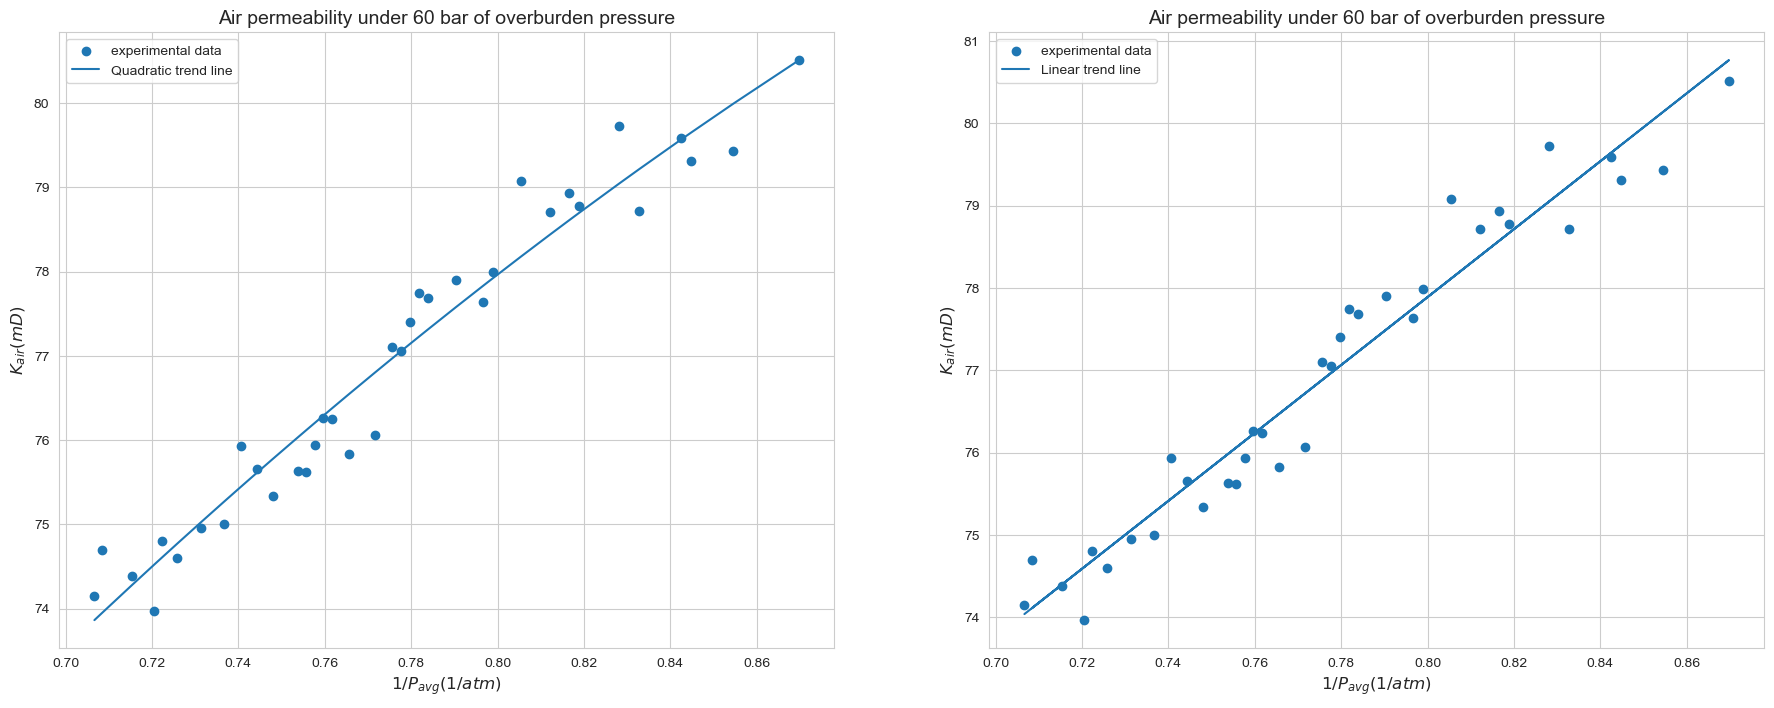

In [14]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 22, 8
plt.figure()

plt.subplot(1,2,1)
plt.scatter(x2, y2, label="experimental data")
plt.plot(x2, ypred, label="Quadratic trend line")
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 12)
plt.ylabel("$K_{air}(mD)$", fontsize = 12)
plt.title("Air permeability under 60 bar of overburden pressure", fontsize = 14)
plt.legend();

plt.subplot(1,2,2)
plt.scatter(df2["1/Pavg(1/atm)"],  df2["Kair(mD)"], label="experimental data")
plt.plot(df2["1/Pavg(1/atm)"], yhat2, label="Linear trend line")
plt.xlabel("$1/P_{avg}(1/atm)$", fontsize = 12)
plt.ylabel("$K_{air}(mD)$", fontsize = 12)
plt.title("Air permeability under 60 bar of overburden pressure", fontsize = 14)
plt.legend();

#### The predictor y of the quadratic line equation is represented by:

In [15]:
f = np.polyfit(df2["1/Pavg(1/atm)"], df2["Kair(mD)"], 2)
p = np.poly1d(f)
print(p)

        2
-45.81 x + 113 x + 16.92


In [16]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Kair(mD)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.43e-22
Time:                        22:43:11   Log-Likelihood:                -18.475
No. Observations:                  36   AIC:                             42.95
Df Residuals:                      33   BIC:                             47.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9162     21.859      0.774      0.4

<ul>
<li><b>The R-squared coefficient is close to 1, which confirms that the trend line is a good fit for the data. Additionally, the R-squared value for the quadratic trend line is slightly lower than the linear trend line, but it still fits the data well.</b></li>
<li><b>The P-value of the F-test is very close to 0, which allows us to reject the null hypothesis that the model with no independent variables fits the data as well as the current model. This is evident and the probability that the second-degree polynomial fits the data by chance is equal to the P-value.</b></li>
<li><b>The standard errors of the coefficients are quite large. Only the p-value of x1 on the t-test is slightly larger than alpha=0.05, but the standard error is still less than half the mean value. The same can be said for the coefficients values within the 95% confidence interval.</b></li>
<li><b> A high condition number suggests a strong presence of multicollinearity, as can be observed in the figures.
</ul>

#### In summary, the regression results indicate that the quadratic trend line fits the data well, but the uncertainty of the coefficients increases as the multicollinearity becomes stronger.

In [17]:
print("The standard error of the y estimate is", np.sqrt(model2.scale), "mD")

The standard error of the y estimate is 0.4222172860759531 mD


#### $${\boldsymbol{K}}_{\boldsymbol{l}}\boldsymbol{=}{\boldsymbol{16},\boldsymbol{9}\boldsymbol{1}\boldsymbol{\ }}^{\boldsymbol{+}}_{\boldsymbol{-}}\boldsymbol{\ }\boldsymbol{0}.\boldsymbol{42}\boldsymbol{\ }\boldsymbol{mD}$$

#### <b>The small value of the standard error of the estimator confirms that the fit is valid if the order of the regression model is known beforehand, as shown in the statistical table.</b>

<h2> 2. Permeability of water </h2>

#### It takes 1200 minutes for the pressure of water flow to stabilize for only two values when the flow rate is low and the overburden pressure is 60 bar. Using Darcy's law, the water permeability ($K_w$) will be calculated from the pressure values.

$$K_w=\frac{Q{\mu }_wL}{A\mathit{\Delta}P}$$ 

In [18]:
#skiprows+2=excel_rows
df3 = pd.read_excel("liquid permeability.xlsx", sheet_name="Kw60bar2", skiprows=0, usecols=[1, 4], nrows=16)  
df3.columns = ["DP1(atm)", "DP2(atm)"]
df3.head()

,DP1(atm),DP2(atm)
0,9.138694,8.566292
1,9.089349,8.526816
2,9.128825,8.556423
3,9.089349,8.546554
4,9.099218,8.516947


In [19]:
df3["Kw1(mD)"] = 1000 * 4 / 60 * 1 * 4.751 / (math.pi * 2.543 ** 2 / 4 * df3["DP1(atm)"])
df3["Kw2(mD)"] = 1000 * 3.5 / 60 * 1 * 4.751 / (math.pi * 2.543 ** 2 / 4 * df3["DP2(atm)"])

In [20]:
df3.head()

,DP1(atm),DP2(atm),Kw1(mD),Kw2(mD)
0,9.138694,8.566292,6.823812,6.369808
1,9.089349,8.526816,6.860857,6.399298
2,9.128825,8.556423,6.831189,6.377155
3,9.089349,8.546554,6.860857,6.384519
4,9.099218,8.516947,6.853416,6.406713


Text(0, 0.5, 'probability density function')

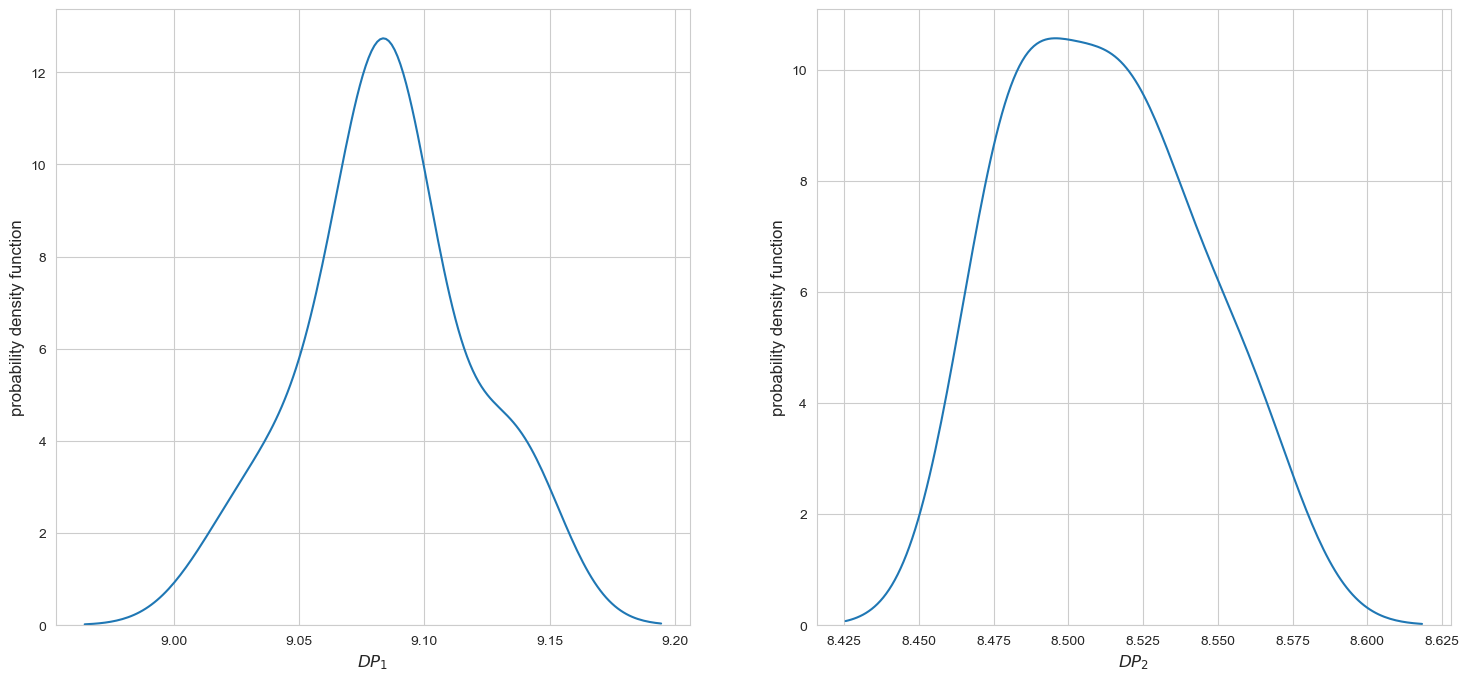

In [21]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(18,8), ncols=2, nrows=1)

p = sns.kdeplot(df3['DP1(atm)'], ax=axes[0])
p.set_xlabel("$DP_{1}$", fontsize = 12)
p.set_ylabel("probability density function", fontsize = 12)

n = sns.kdeplot(df3['DP2(atm)'], ax=axes[1])
n.set_xlabel("$DP_{2}$", fontsize = 12)
n.set_ylabel("probability density function", fontsize = 12)

#### From the probability density function figures, it is obvious that the stabilized pressures are normally distributed. The mean values, standard deviation, and the median of the quadrilles are displayed in the table below.

In [22]:
df3.describe()

,DP1(atm),DP2(atm),Kw1(mD),Kw2(mD)
count,16.000000,15.000000,16.000000,15.000000
mean,9.085031,8.511684,6.864200,6.410748
std,0.032427,0.029810,0.024503,0.022425
min,9.020266,8.477471,6.823812,6.369808
25%,9.077013,8.482405,6.858997,6.399298
50%,9.084414,8.507078,6.864586,6.414146
75%,9.091816,8.526816,6.870183,6.432804
max,9.138694,8.566292,6.913402,6.436546


#### Conducting a t-test at a 99% confidence level for DP1:

In [23]:
import scipy.stats as stats
import math

sigma_DP1 = df3["DP1(atm)"].std() / math.sqrt(df3["DP1(atm)"].count())
stats.t.interval(0.99, df=df3["DP1(atm)"].count() - 1, loc=df3["DP1(atm)"].mean(), scale=sigma_DP1)

(9.06114335238976, 9.10891927261024)

In [24]:
σ_DP1 = df3["DP1(atm)"].mean() - 9.061419953784334
print("The standard deviation of DP1 is", σ_DP1, "atm")

The standard deviation of DP1 is 0.023611358715665887 atm


In [25]:
print("The difference between the sample and t-test's standard deviation is", df3["DP1(atm)"].std() - σ_DP1 , "atm")

The difference between the sample and t-test's standard deviation is 0.008815227865345748 atm


#### Following the same procedure for DP2:

In [26]:
sigma_DP2 = df3["DP2(atm)"].std() / math.sqrt(df3["DP2(atm)"].count())
stats.t.interval(0.99, df=df3["DP2(atm)"].count() - 1, loc=df3["DP2(atm)"].mean(), scale=sigma_DP2)

(8.488771084083348, 8.534595982583314)

In [27]:
σ_DP2 = df3["DP2(atm)"].mean() - 8.491450080133093
print("The standard deviation of DP2 is", σ_DP2, "atm")

The standard deviation of DP2 is 0.020233453200237506 atm


In [28]:
print("The difference between the sample and t-test's standard deviation is", df3["DP2(atm)"].std() - σ_DP2, "atm")

The difference between the sample and t-test's standard deviation is 0.009576497237893 atm


$${\mathit{D}P}_1={9.086\ }^+_-\ 0.024\ atm$$ 
$${\mathit{D}P}_2={8.515\ }^+_-\ 0.023\ atm$$

#### From Darcy's law, the water permeability ($K_w$) will be calculated using the pressure values obtained.

In [29]:
K_w1 = df3["Kw1(mD)"].mean()
print("The first stabilized value of water permeability is", K_w1, "mD")

The first stabilized value of water permeability is 6.864199996379872 mD


In [30]:
K_w2 = df3["Kw2(mD)"].mean()
print("The second stabilized value of water permeability is", K_w2, "mD")

The second stabilized value of water permeability is 6.4107482205958926 mD


$$K_{w1}=6,86\ mD$$ 
$$K_{w2}=\ 6,41\ mD$$ 

<b>
The difference in water permeability is not due to measurement error, as the pressure error is minimal. It is evident that when the flow rate of the measurements is higher, under an overburden pressure of 150 bar, this is caused by electroosmotic phenomena, which is the electrostatic interaction between the clay particles of the rock and polar fluids like water. The fluid exhibits plastic behavior, in that a threshold pressure is needed for flow to begin. The maximum permeability of plastic flow is equivalent to the intrinsic permeability of the rock when electroosmotic phenomena are negligible. The absolute permeability will be calculated using the Buckingham-Reiner equation.
</b>

$$K_w\left(\mathit{D}P\right)=\frac{\mathit{\Phi}R^2}{8}\left[1-\frac{4}{3}\left(\frac{2L{\tau }}{R\mathit{D}P}\right)+\frac{1}{3}{\left(\frac{2L{\tau }}{R\mathit{D}P}\right)}^4\right]$$

##### Setting $x=\frac{\tau }{R}$ and dividing $K_{w1}({\mathit{D}P}_1)$ by $K_{w2}({\mathit{D}P}_2):$

$$ax^4+bx+c=0$$

$$a=\frac{16}{3}L^4\left(\frac{K_{w2}}{{{\mathit{D}P}_1}^4}-\frac{K_{w1}}{{{\mathit{D}P}_2}^4}\right),\ \ b=\frac{8}{3}L\left(\frac{K_{w1}}{{\mathit{D}P}_2}-\frac{K_{w2}}{{\mathit{D}P}_1}\right),\ \ c=K_{w2}-K_{w1}$$

In [31]:
a = 16 / 3 * 0.04751 ** 4 * (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** -16 / (df3["DP1(atm)"].mean() * 101325) ** 
    4 - df3["Kw1(mD)"].mean() * 9.86923266716 * 10 ** -16 / (df3["DP2(atm)"].mean() * 101325) ** 4) * 10 ** 16

In [32]:
b = 8 / 3 * 0.04751 * (df3["Kw1(mD)"].mean() * 9.86923266716 * (10 ** -16) / (df3["DP2(atm)"].mean() * 101325) - 
    df3["Kw2(mD)"].mean() * 9.86923266716 * (10 ** -16) / (df3["DP1(atm)"].mean() * 101325)) * 10 ** 16

In [33]:
c = (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** -16 - df3["Kw1(mD)"].mean() * 9.86923266716 * 10 ** -16) * 10 ** 16

#### The root of $f(x)=ax^4+bx+c$ will be calculated using the Newton-Raphson method. Defining the Equation and its Derivative:

In [34]:
def f(x):
    res = a * x ** 4 + b * x + c
    return res
 
def dfdx(x):
    res = 4 * a * x ** 3 + b
    return res

#### A maximum number of iterations, decimal tolerance, iteration counter, and initial guess for the root are set. The algorithm will continue to iterate until either the tolerance or the maximum number of iterations is reached.

In [35]:
max_iter = 100 
tol = 1E-15  
i = 0  
x0 = 5E+06  
xi_1 = x0

print("Iteration " + str(i) + ": x = " + str(x0) + ", f(x) = " + str(f(x0)))
while abs(f(xi_1)) > tol or i > max_iter:
    i = i + 1
    xi = xi_1-f(xi_1)/dfdx(xi_1)  
    print("Iteration " + str(i) + ": x = " + str(xi) + ", f(x) = " +  str(f(xi)))
    xi_1 = xi

Iteration 0: x = 5000000.0, f(x) = 1.1614267699266048
Iteration 1: x = 3506082.484584099, f(x) = -0.25478441362929694
Iteration 2: x = 3741317.203776216, f(x) = -0.003981228985428409
Iteration 3: x = 3745114.239267704, f(x) = -1.1305424632013228e-06
Iteration 4: x = 3745115.318117996, f(x) = -9.14823772291129e-14
Iteration 5: x = 3745115.3181180833, f(x) = 0.0


#### The radius of the capillaries will be determined using the Buckingham-Reiner equation.

In [36]:
R = np.sqrt( 8 * (df3["Kw2(mD)"].mean() * 9.86923266716 * 10 ** - 16) / (0.183154 * (1 - 4 / 3 * (2 * 0.04751 * xi / 
    (df3["DP2(atm)"].mean() * 101325)) + 1 / 3 * (2 * 0.04751 * xi / (df3["DP2(atm)"].mean() * 101325)) ** 4))) * 10 ** 6
print("The radius of the capillaries is", R, "μm")

The radius of the capillaries is 0.7755107422754275 μm


#### The threshold shear stress between the layers of water for the flow to be initiated:

In [37]:
τ = R * 10 ** -6 * xi
print("The threshold shear stress equals", τ, "Pa")

The threshold shear stress equals 2.9043771602608284 Pa


$$K_{max}={\mathop{lim}_{\mathit{\Delta}P\to \infty } K_w\left(\mathit{\Delta}P\right)\ }=\frac{\mathit{\Phi}R^2}{8}$$

In [38]:
K_max = (R * 10 ** -6) ** 2 * 0.183154 / 8 * 1.01325 * 10 ** 15
print("The maximum permeability of water is", K_max, "mD")

The maximum permeability of water is 13.951428229352453 mD


#### $${\boldsymbol{K}}_{\boldsymbol{max}}\boldsymbol{=}\boldsymbol{14}.\boldsymbol{02}\boldsymbol{\ }\boldsymbol{mD}$$

In [39]:
#skiprows+2=excel_rows
df4 = pd.read_excel("liquid permeability.xlsx", sheet_name="Kw60bar2", skiprows=33, usecols=[10, 11], nrows=22)  
df4.columns = ["DP(atm)", "Kw(mD)"]
df4.head()

,DP(atm),Kw(mD)
0,5.0,2.017243
1,5.5,2.846234
2,6.0,3.608828
3,6.5,4.296833
4,7.0,4.913078


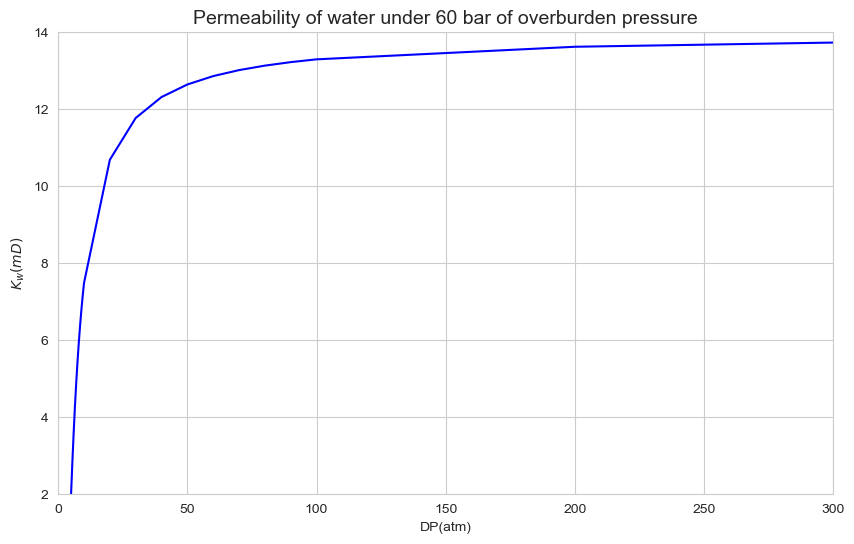

In [40]:
width = 10
height = 6
plt.figure(figsize=(width, height))

plt.xlabel("DP(atm)", fontsize = 10)
plt.ylabel("$K_{w}(mD)$", fontsize = 10)
plt.ylim((2,14))
plt.xlim((0,300))
plt.title("Permeability of water under 60 bar of overburden pressure", fontsize = 14)

plt.plot(df4["DP(atm)"], df4["Kw(mD)"], "b")

#### From the figure, it is clear that the permeability of water reaches a plateau. With an infinite value for the differential pressure, the permeability line meets the plateau at 14.02 mD.

#### The pressure of water when the flow rate is higher, under 150 bar of overburden pressure, stabilized completely and the values were much higher. This allows the experimental data to be compared with the Buckingham-Reiner line. Additionally, when the flow rate is decreased, the values also stabilized quickly.

In [41]:
#skiprows+2=excel_rows
df5 = pd.read_excel("liquid permeability.xlsx", sheet_name="Kw,abs150bar", skiprows=91, usecols=[11, 13], nrows=8)  
df5.columns = ["DP(atm)", "Kw(mD)"]
df5.head()

,DP(atm),Kw(mD)
0,80.9258,1.155887
1,90.7948,1.201955
2,68.0961,1.144719
3,55.2664,1.128366
4,44.4105,1.053142


#### The same procedure will be followed as well.

$$K_{w1}=0.59\ mD$$ 
$$K_{w2}=\ 1.20\ mD$$ 

In [42]:
K_w2 = df5.iat[0,1]
DP_2 = df5.iat[0,0]

K_w1 = df5.iat[7,1]
DP_1 = df5.iat[7,0]

In [43]:
a = 16 / 3 * 0.04751 ** 4 * (K_w2 * 9.86923266716 * 10 ** -16 / (DP_1*101325) ** 4 - K_w1 * 9.86923266716 * 
    10 ** -16 / (DP_2 * 101325) ** 4) * 10 ** 16

In [44]:
b = 8 / 3 * 0.04751 * (K_w1 * 9.86923266716 * (10 ** -16) / (DP_2 * 101325) - K_w2 * 9.86923266716 * (10 ** -16) / 
    (DP_1 * 101325)) * 10 ** 16

In [45]:
c = (K_w2 * 9.86923266716 * 10 ** -16 - K_w1 * 9.86923266716 * 10 ** -16) * 10 ** 16

In [46]:
def f(x):
    res = a * x ** 4 + b * x + c
    return res
 
def dfdx(x):
    res = 4 * a * x ** 3 + b
    return res

In [47]:
max_iter = 100 
tol = 1E-15  
i = 0  
x0 = 6E+6  
xi_1 = x0

print("Iteration " + str(i) + ": x = " + str(x0) + ", f(x) = " + str(f(x0)))
while abs(f(xi_1)) > tol or i > max_iter:
    i = i + 1
    xi = xi_1-f(xi_1)/dfdx(xi_1)  
    print("Iteration " + str(i) + ": x = " + str(xi) + ", f(x) = " + str(f(xi)))
    xi_1 = xi

Iteration 0: x = 6000000.0, f(x) = -0.13396613669291657
Iteration 1: x = 5851276.994224702, f(x) = 0.0004384304582805143
Iteration 2: x = 5851760.580429781, f(x) = 4.482355819845907e-09
Iteration 3: x = 5851760.585373894, f(x) = 0.0


In [48]:
R = np.sqrt(8 * (K_w2 * 9.86923266716 * 10 ** -16) / ( 0.183154 * (1 - 4 / 3 * (2 * 0.04751 * xi / 
    (DP_2 * 101325)) + 1 / 3 * (2 * 0.04751 * xi / (DP_2 * 101325)) ** 4))) * 10 ** 6
print("The radius of the capillaries is", R, "μm")

The radius of the capillaries is 0.23405217497585218 μm


In [49]:
τ = R * 10 ** -6 * xi
print("The threshold shear stress equals", τ, "Pa")

The threshold shear stress equals 1.3696172924447259 Pa


In [50]:
K_max = (R * 10 ** -6) ** 2 * 0.183154 / 8 * 1.01325 * 10 ** 15
print("The maximum permeability of water is", K_max, "mD")

The maximum permeability of water is 1.2707742201122887 mD


#### $${\boldsymbol{K}}_{\boldsymbol{max}}\boldsymbol{=}\boldsymbol{1}.\boldsymbol{31}\boldsymbol{\ }\boldsymbol{mD}$$

#### Creating a data frame using the Buckingham-Reiner equation:

In [51]:
#skiprows+2=excel_rows
df6 = pd.read_excel("liquid permeability.xlsx", sheet_name="Kw,abs150bar", skiprows=116, usecols=[25, 28], nrows=10)  
df6.columns = ["DP(atm)", "Kw(mD)"]
df6.head()

,DP(atm),Kw(mD)
0,10,0.369500
1,20,0.820664
2,30,0.982630
3,40,1.064347
4,50,1.113499


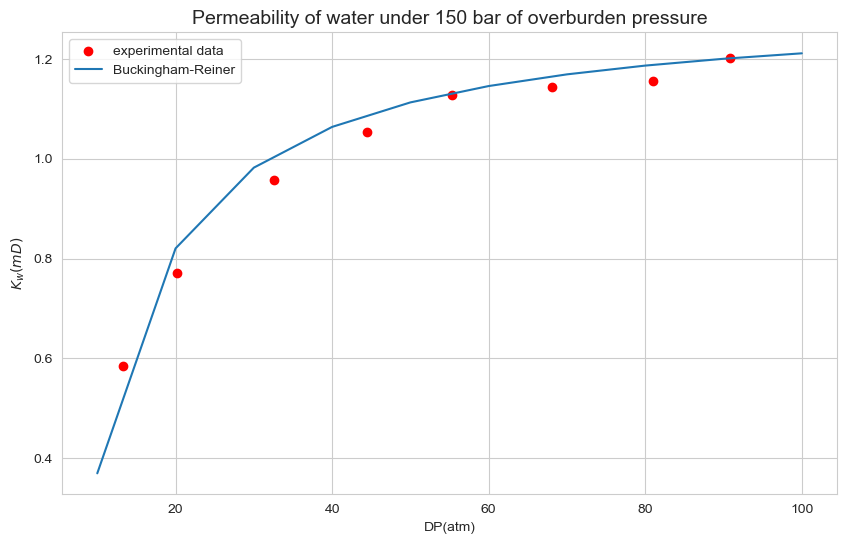

In [52]:
width = 10
height = 6
plt.figure(figsize=(width, height))

plt.xlabel("DP(atm)", fontsize = 10)
plt.ylabel("$K_{w}(mD)$", fontsize = 10)
plt.title("Permeability of water under 150 bar of overburden pressure", fontsize = 14)

plt.scatter(df5["DP(atm)"], df5["Kw(mD)"], c ="red", label="experimental data")
plt.plot(df6["DP(atm)"], df6["Kw(mD)"], label="Buckingham-Reiner")
plt.legend();

<b>
As it is evident from the figure, the experimental data are in close proximity to the Buckingham-Reiner line. It is also worth noting that the corrected air permeability and the maximum permeability of the plastic flow, under the same overburden pressure, are very similar to each other. This suggests that they are consistent with the absolute permeability of the sandstone.
</b>